In [1]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.5 MB 8.7 MB/s 
     |████████████████████████████████| 182 kB 41.5 MB/s 
     |████████████████████████████████| 7.6 MB 11.1 MB/s 


In [2]:
!unzip "KG Samples.zip"
!unzip TypeVectors_10.zip

Archive:  KG Samples.zip
   creating: KG Samples/
  inflating: KG Samples/Year.csv     
  inflating: KG Samples/Manufacturer.csv  
  inflating: KG Samples/Specialization.csv  
  inflating: KG Samples/Country.csv  
  inflating: KG Samples/City.csv     
  inflating: KG Samples/Group.csv    
  inflating: KG Samples/Language.csv  
  inflating: KG Samples/Record Label.csv  
  inflating: KG Samples/Religious Position.csv  
  inflating: KG Samples/TV_Network.csv  
  inflating: KG Samples/Continent.csv  
  inflating: KG Samples/Religion.csv  
  inflating: KG Samples/Football Position.csv  
  inflating: KG Samples/Genre.csv    
  inflating: KG Samples/Musical Instrument.csv  
  inflating: KG Samples/Occupation.csv  
  inflating: KG Samples/Organization.csv  


In [10]:

import torch
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm import tqdm
from pathlib import Path
from random import sample
from random import randint
import matplotlib.pyplot as plt
from numpy.random import choice
from scipy.stats import  kurtosis
from transformers import BertTokenizer,BertForMaskedLM

model_arch = 'bert-base-cased'
model = BertForMaskedLM.from_pretrained(model_arch)
tokenizer = BertTokenizer.from_pretrained(model_arch)
vocab = list(tokenizer.get_vocab().keys())


Some weights of the model checkpoint at bert-base-cased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [8]:
def get_tkiz_files(type_,num_runs,num_samples):
    type_df = pd.read_csv(f'KG Samples/{type_}.csv')

    type_df.Label = type_df.Label.apply(lambda x: str(x))
    all_samples = list(type_df.Label)
    importances = np.array(type_df.Degree)
    importances_p=importances/sum(importances)
    samples = choice(all_samples,size = min(num_samples,len(type_df)),replace = False,p = importances_p)

    for i in [0,1,2,3,randint(4,767)]:
      collected_samples = []
      for _ in tqdm(range(num_runs)):
        samples = sample(all_samples,num_samples)
        token_indices=[vocab.index(n) for n in samples]
        with torch.no_grad():
            stacked_vectors = torch.stack([model.bert.embeddings.word_embeddings(torch.tensor(i)) for i in token_indices]).detach().numpy()
        u, s, vt = np.linalg.svd(stacked_vectors, full_matrices=True)
        svd_vector = torch.tensor(vt[i])
        collected_samples.append(svd_vector.cpu().numpy())
      collected_samples=[np.mean(x) for x in collected_samples]
      print(f'Kurtosis:{kurtosis(collected_samples)}')
      s=sns.histplot(data=collected_samples, kde=False)
      s.set(title=f'Component #{i}')
      s=pd.DataFrame([(x.xy[0],x.get_height()) for x in s.patches],columns=['x','y'])
      s['rx']=s.x.apply(lambda x: round(x,2))
      #Path('tikz/'+type_).mkdir(parents=True, exist_ok=True)
      #s.to_csv(f'tikz/{type_}/{type_.lower().replace(" ","_")}_v{i+1}.csv',index=False)
      plt.show()

100%|██████████| 500/500 [00:10<00:00, 49.14it/s]


Kurtosis:191.36603419907766


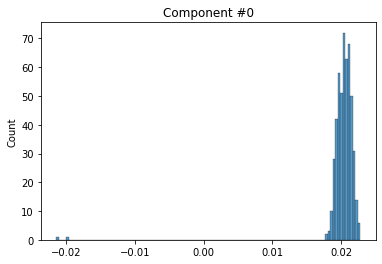

100%|██████████| 500/500 [00:09<00:00, 50.60it/s]


Kurtosis:1.55395988445738


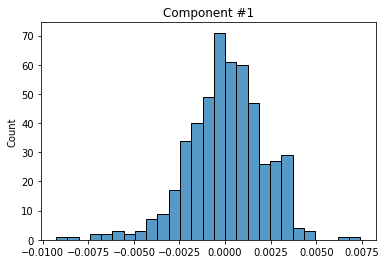

100%|██████████| 500/500 [00:09<00:00, 52.54it/s]


Kurtosis:0.08919940107728452


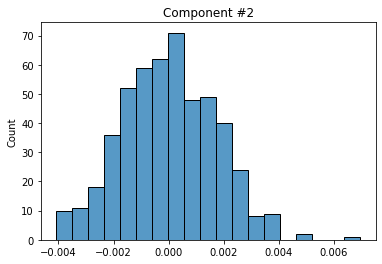

100%|██████████| 500/500 [00:09<00:00, 51.65it/s]


Kurtosis:0.45768070117540693


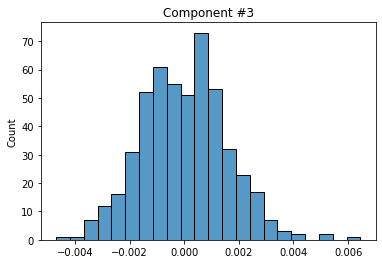

100%|██████████| 500/500 [00:09<00:00, 53.03it/s]


Kurtosis:-0.2570140705423829


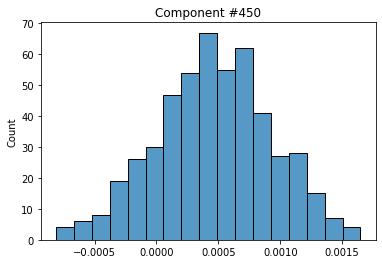

In [11]:
get_tkiz_files('City',500,10)

100%|██████████| 500/500 [00:11<00:00, 45.05it/s]


Kurtosis:31.340715685274148


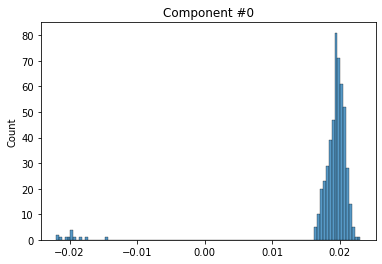

100%|██████████| 500/500 [00:11<00:00, 44.84it/s]


Kurtosis:-0.6757929898839321


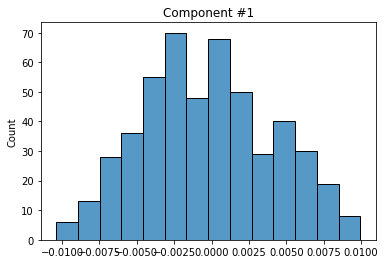

100%|██████████| 500/500 [00:10<00:00, 50.00it/s]


Kurtosis:0.6333277407712687


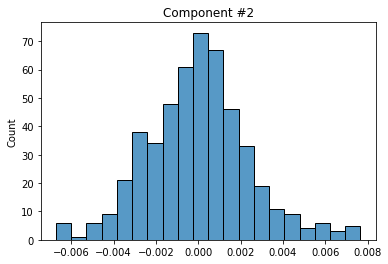

100%|██████████| 500/500 [00:10<00:00, 47.90it/s]


Kurtosis:-0.04762697495965096


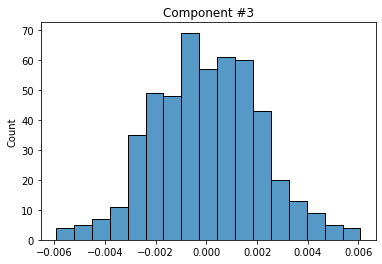

100%|██████████| 500/500 [00:10<00:00, 48.51it/s]


Kurtosis:0.33501419628506834


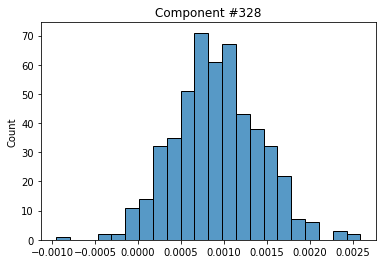

In [12]:
get_tkiz_files('Language',500,10)

100%|██████████| 500/500 [00:09<00:00, 50.18it/s]


Kurtosis:132.5842769406157


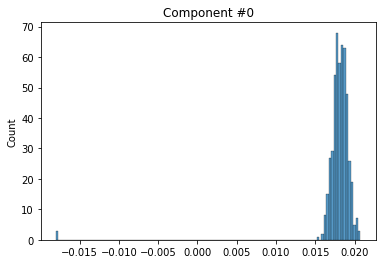

100%|██████████| 500/500 [00:10<00:00, 49.95it/s]


Kurtosis:-0.4332238458254847


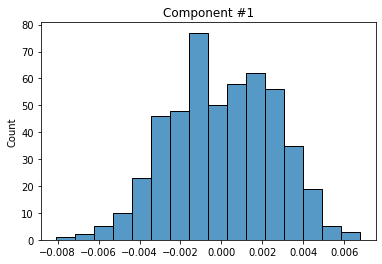

100%|██████████| 500/500 [00:09<00:00, 50.63it/s]


Kurtosis:-0.2751741677471373


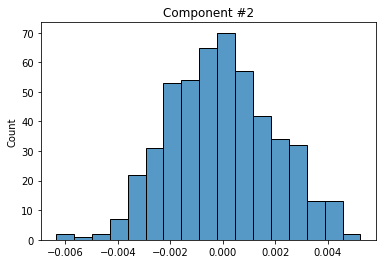

100%|██████████| 500/500 [00:09<00:00, 51.56it/s]


Kurtosis:-0.28397907776138887


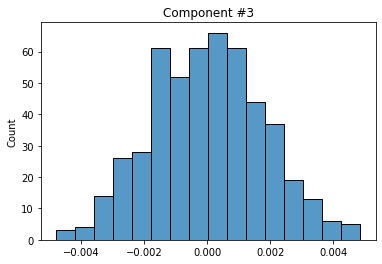

100%|██████████| 500/500 [00:09<00:00, 50.18it/s]


Kurtosis:-0.12542492818140616


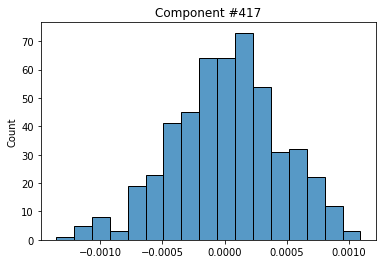

In [13]:
get_tkiz_files('Occupation',500,10)